In [2]:
import numpy as np
from  cv2 import imread
import matplotlib.pyplot as plt

In [32]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))


def imhist(X):
  (N,M) = X.shape
  n = 256
  h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  plt.figure(figsize=(60,9))
  plt.bar(range(n),h[0:n])
  plt.show()


In [21]:
def hist_forceuni(img):

    img_x = img.copy()
    img_x = 255 * ((img_x - img_x.min()) / (img_x.max() - img_x.min())) 

    n, m = img_x.shape
    y = np.zeros((n * m, 1), dtype=np.uint8)
    j = np.argsort(img_x.flatten())
    z = np.zeros((n * m, 1), dtype=np.uint8)
    d = np.int64(np.fix((n * m / 256) + 0.5))

    for i in range(255):
        z[i * d:(i + 1) * d] = i * np.ones((d, 1))  # , dtype=np.uint8)
    z[255 * d:n * m] = 255 * np.ones((n * m - 255 * d, 1))  # , dtype=np.uint8)

    y[j] = z
    y = y.reshape(n, m)

    return y


size =  (512, 512)
max  =  224
min  =  74


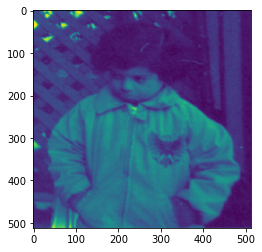

In [33]:
X = imread('pout.png',0)      
plt.imshow(X)
howis(X)

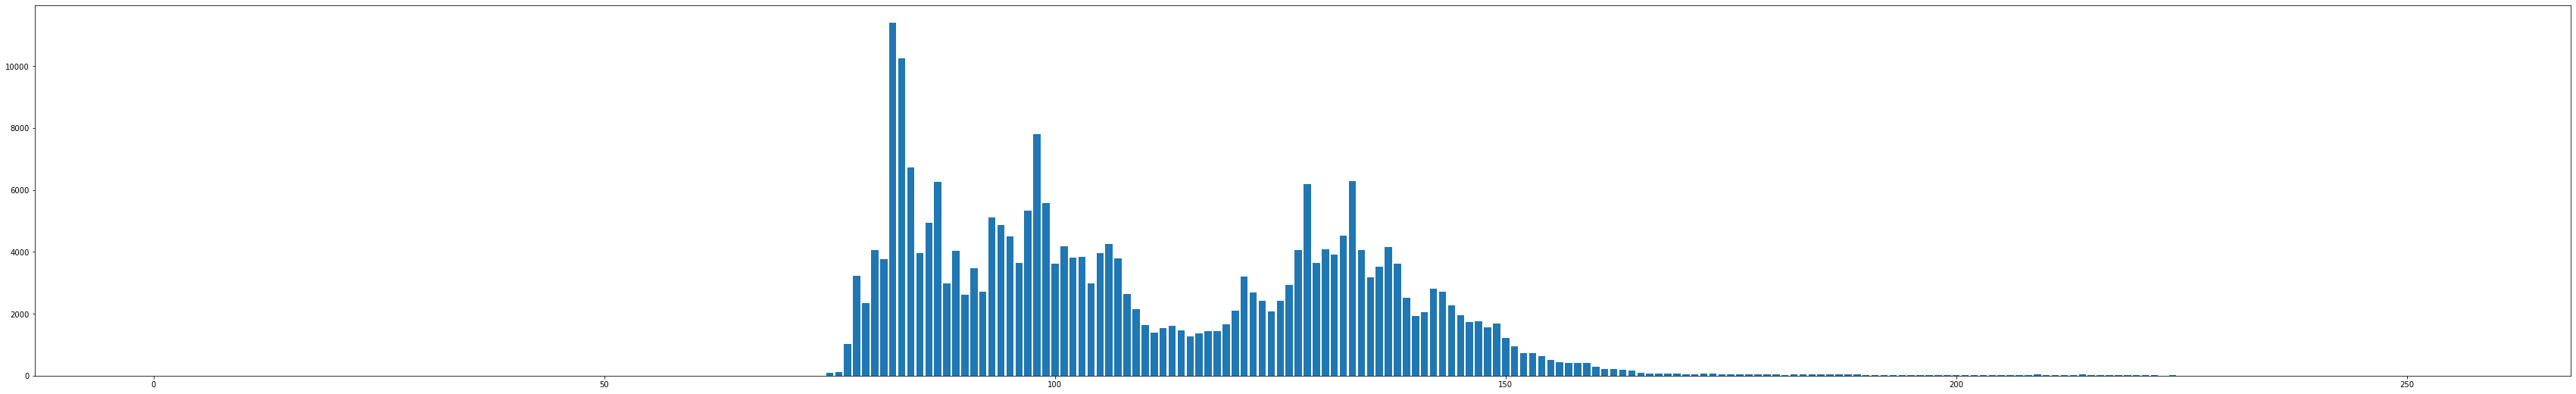

In [34]:
imhist(X)

size =  (512, 512)
max  =  255
min  =  0


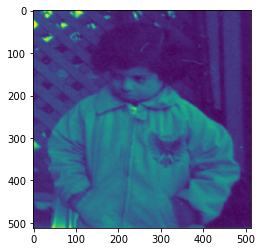

In [14]:
  Y = X.copy()
  Y = 255 * ((Y - Y.min()) / (Y.max() - Y.min())) 
  Y = Y.astype(np.uint8)
  howis(Y)
  plt.imshow(Y)



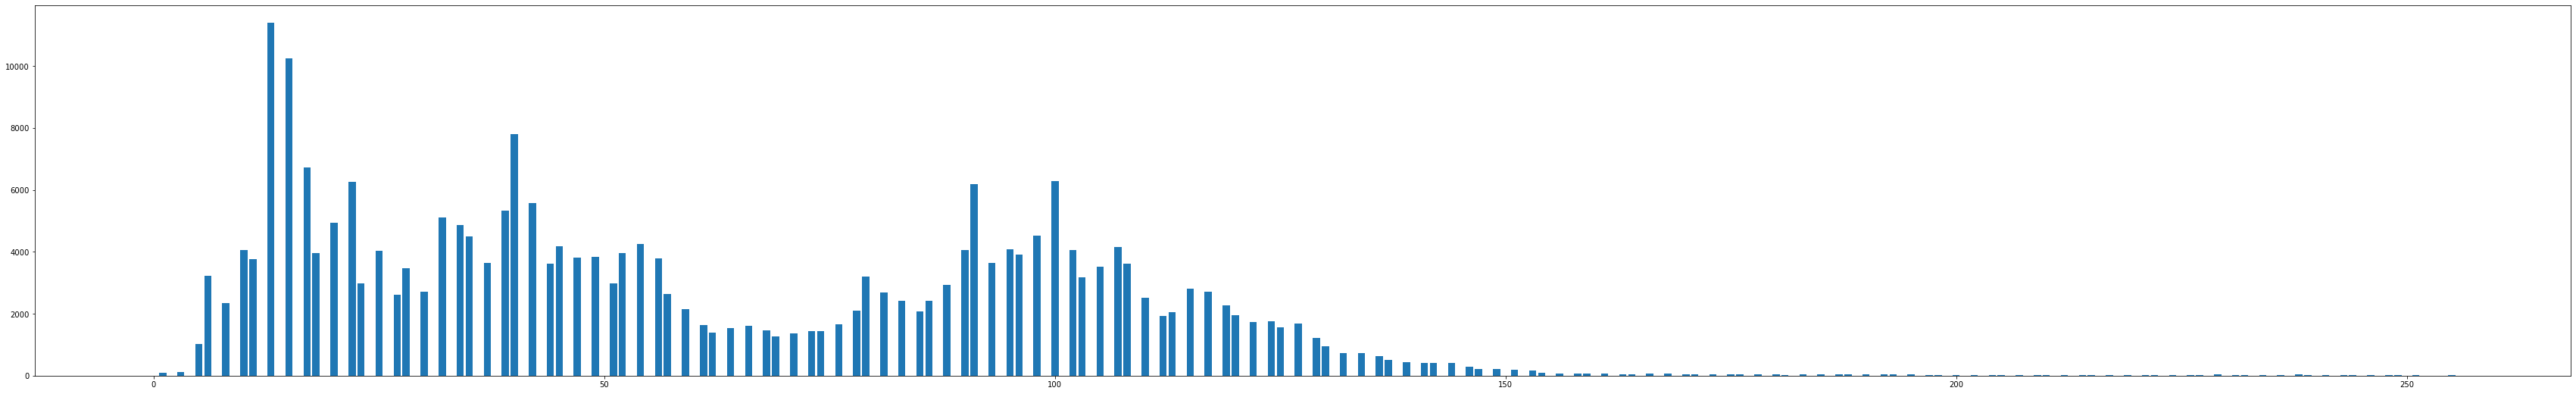

In [15]:
imhist(Y)

size =  (512, 512)
max  =  255
min  =  0


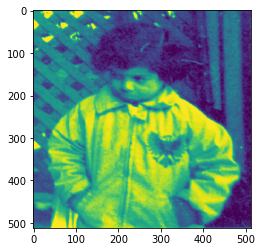

In [22]:
Z = hist_forceuni(X)
howis(Z)
plt.imshow(Z)

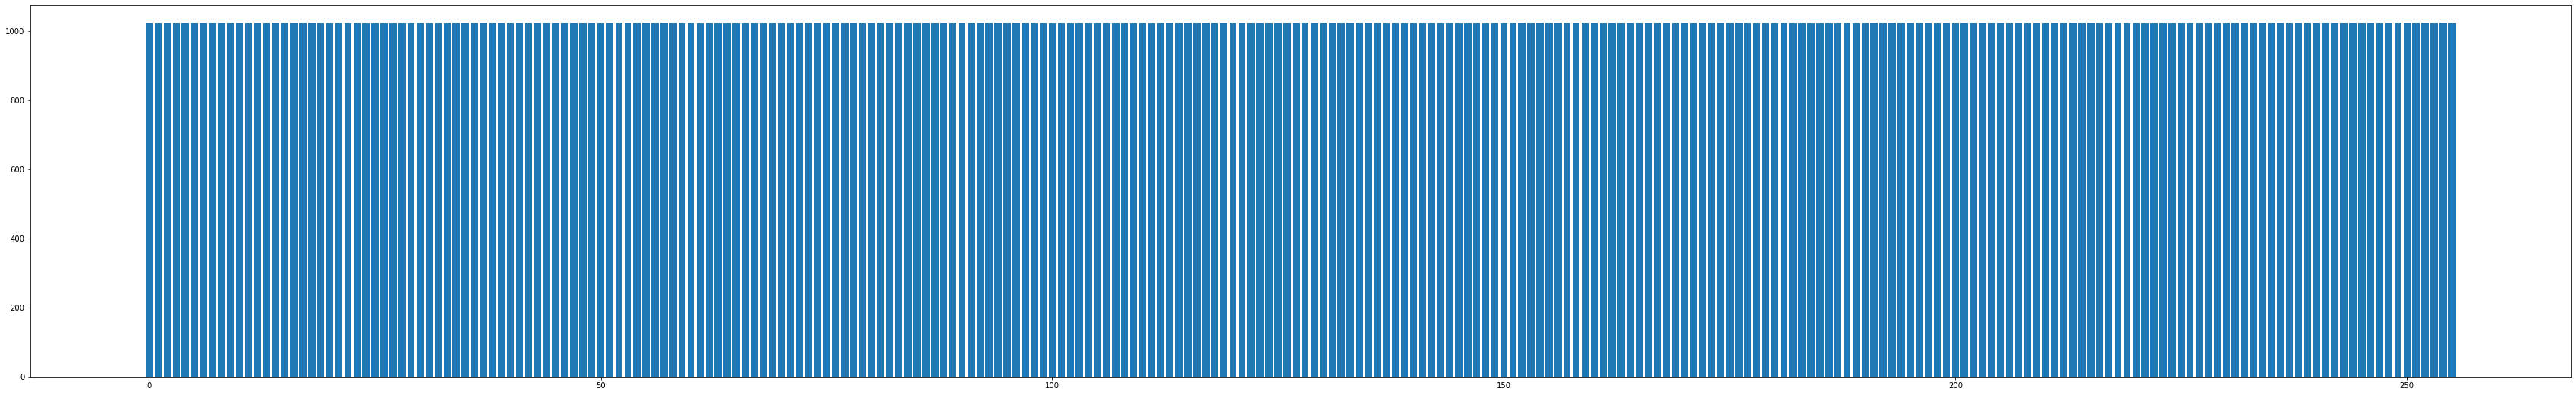

In [23]:
imhist(Z)

Ver implementación [from skratch](https://medium.com/hackernoon/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23)

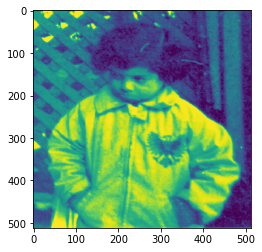

In [24]:
from cv2 import equalizeHist 
Q = equalizeHist(X)
plt.imshow(Q)

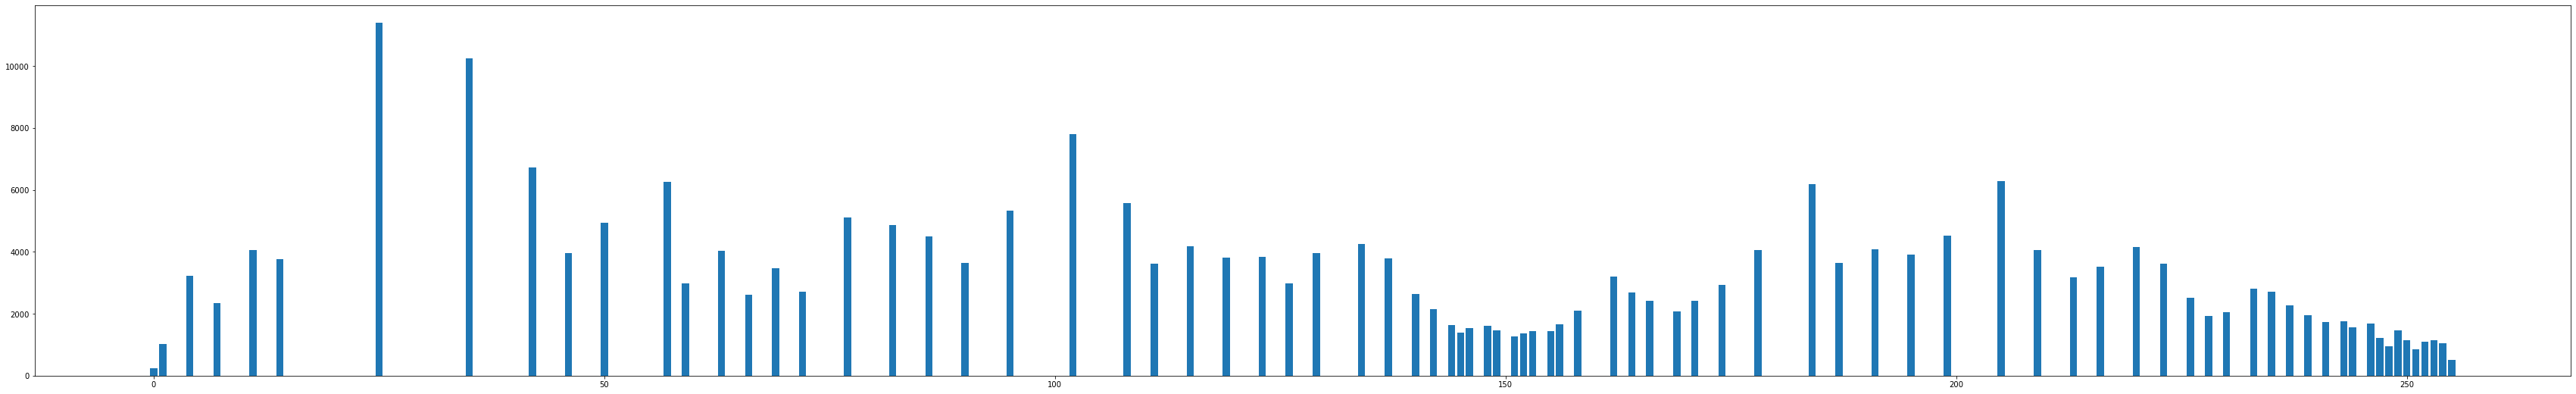

In [25]:
imhist(Q)